In [1]:
# Imports
# https://docs.fast.ai/tabular.data.html
from fastai.tabular.all import *
import pandas as pd

In [2]:
# Read Data
df_train = pd.read_csv("data/clean_fraudTrain.csv")
df_test= pd.read_csv("data/clean_fraudTest.csv")
df_train.head()

,credit_card_num,shop,category,amount,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,57
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,52
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,33


In [3]:
cat_cols = ['shop','category', 'gender','job']
cont_cols = ['credit_card_num', 'amount','lat','long','city_pop','merch_lat','merch_long','age']
y_names = 'is_fraud'
procs = [Categorify, FillMissing, Normalize]

In [4]:
dls = TabularDataLoaders.from_df(df_train, path='.', y_names="is_fraud",  
                                 cat_names = cat_cols, 
                                 cont_names = cont_cols, 
                                 procs=procs, 
                                 y_block = CategoryBlock())

In [5]:
tab_learn = tabular_learner(dls, metrics=[accuracy, error_rate, Recall(), Precision()])

SuggestedLRs(valley=0.0010000000474974513)

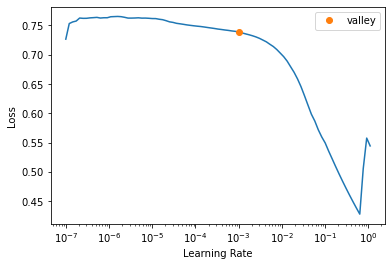

In [6]:
tab_learn.lr_find()

In [7]:
tab_learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.010948,0.013786,0.995620,0.004380,0.223140,0.975904,03:13


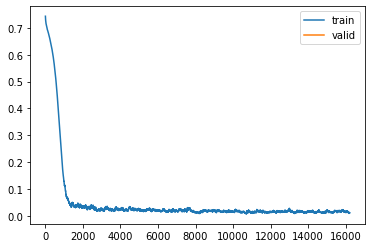

In [8]:
tab_learn.recorder.plot_loss()

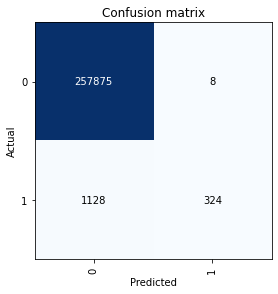

In [9]:
interpret = ClassificationInterpretation.from_learner(tab_learn)
interpret.plot_confusion_matrix()

In [10]:
interpret.print_classification_report()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257883
           1       0.98      0.22      0.36      1452

    accuracy                           1.00    259335
   macro avg       0.99      0.61      0.68    259335
weighted avg       1.00      1.00      0.99    259335



In [11]:
test_dl = tab_learn.dls.test_dl(df_test)
test_dl.show_batch()

,shop,category,gender,job,credit_card_num,amount,lat,long,city_pop,merch_lat,merch_long,age,is_fraud
0,fraud_Kirlin and Sons,personal_care,M,Mechanical engineer,2.291152e+15,2.859998,33.9659,-80.935500,333496.992327,33.986391,-81.200714,52.000000,0
1,fraud_Sporer-Keebler,personal_care,F,"Sales professional, IT",3.573013e+15,29.840001,40.3207,-110.436001,301.997900,39.450498,-109.960430,30.000000,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,"Librarian, public",3.598230e+15,41.280000,40.6729,-73.536500,34495.999469,40.495810,-74.196110,50.000000,0
3,fraud_Haley Group,misc_pos,M,Set designer,3.591916e+15,60.050000,28.5697,-80.819100,54766.999079,28.812398,-80.883061,33.000000,0
4,fraud_Johnston-Casper,travel,M,Furniture designer,3.526827e+15,3.190001,44.2529,-85.017000,1125.999518,44.959148,-85.884734,65.000000,0
5,fraud_Daugherty LLC,kids_pets,F,Psychotherapist,3.042443e+13,19.549999,42.1939,-76.736100,520.002413,41.747157,-77.584197,29.000000,0
6,fraud_Romaguera Ltd,health_fitness,F,"Therapist, occupational",2.131800e+14,133.929999,40.5070,-123.974300,1138.995906,41.499458,-124.888730,68.999999,0
7,fraud_Reichel LLC,personal_care,F,"Development worker, international aid",3.589305e+15,10.369998,43.7557,-97.593600,343.003125,44.495498,-97.728453,48.000000,0
8,"fraud_Goyette, Howell and Collier",shopping_pos,M,Advice worker,3.596360e+15,4.370000,41.0001,-78.235700,3687.998059,41.546067,-78.120238,47.000000,0
9,fraud_Kilback Group,food_dining,F,Barrister,3.546900e+15,66.540000,31.6591,-96.809400,262.999735,31.782919,-96.366185,64.000001,0


In [12]:
preds, test_labels = tab_learn.get_preds(dl=test_dl)

In [13]:
preds

tensor([[9.9932e-01, 6.8074e-04],
        [9.9848e-01, 1.5228e-03],
        [9.9941e-01, 5.9437e-04],
        ...,
        [9.9943e-01, 5.7108e-04],
        [9.9593e-01, 4.0690e-03],
        [9.9999e-01, 1.1525e-05]])